# Multiple Linear Regression 
## Assignment -- BoomBikes model building
​
#### Problem Statement:
​
So here we have been given a dataset which has the data related to a bike rental company called BoomBikes who wants some business related answers such as how would be the market after covid in respect to the demand and taste of the customer and what are the steps which they can take to meet all the requirements.

​
Practically, the company wants —
​
​
- To find ou the demand and the factor ( variables ) afffecting that.
​
- To create a linear model that will be used by the business and the management to understand how exactly the demands vary with different features.
​
- As part of the assignment it would also be important to capture how performant is teh model.
​


In [435]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [436]:
bike_sharing_data_df = pd.read_csv("day.csv")

In [437]:
bike_sharing_data_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [438]:
bike_sharing_data_df.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

# the below details shows we do not have any missing values as there is no nulls

In [439]:
bike_sharing_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [440]:
bike_sharing_data_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# The next step is to remove the unwanted columns which would not help in the prediction and model building

### Removing intant column as its unique and just showing the row numbering

In [441]:
bike_sharing_data_df = bike_sharing_data_df.drop(["instant"],axis=1)

### Removing casual and regitered column which will not be used as we have our target variable cnt which is a cobined sum of regitered and casual

In [442]:
bike_sharing_data_df = bike_sharing_data_df.drop(["casual","registered"],axis=1)

### Removing the dteday column as there won't be any affect of this variable

In [443]:
bike_sharing_data_df = bike_sharing_data_df.drop(["dteday"],axis=1)

## Interpretting some column with proper values such as for season and weathersit

In [444]:
bike_sharing_data_df['season'] = bike_sharing_data_df['season'].apply(lambda x: 'spring' if x==1 else 'summer' if x==2 else 'fall' if x==3 else 'winter')

In [445]:
bike_sharing_data_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [446]:
bike_sharing_data_df['weathersit'] = bike_sharing_data_df['weathersit'].apply(lambda x: 'Clear' if x==1 else 'Mist_Cloudy' if x==2 else 'Light_Snow_Rain' if x==3 else 'Heavy_Rain')

In [447]:
bike_sharing_data_df['mnth'] = bike_sharing_data_df['mnth'].apply(lambda x: 'january' if x==1 else 'february' if x==2 else 'march' if x==3 else 'april' if x==4 else 'may' if x==5 else 'june' if x==6 else 'july' if x==7 else 'august' if x==8 else 'september' if x==9 else 'october' if x==10 else 'november' if x==11 else 'december')

In [448]:
bike_sharing_data_df['weekday'] = bike_sharing_data_df['weekday'].apply(lambda x: 'sunday' if x==0 else 'monday' if x==1 else 'tuesday' if x==2 else 'wednesday' if x==3 else 'thursday' if x==4 else 'friday' if x==5 else 'saturday')

In [449]:
bike_sharing_data_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,january,0,saturday,0,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,january,0,sunday,0,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,january,0,monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,january,0,tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,january,0,wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## Just visualising the data to understand the relationship among each other

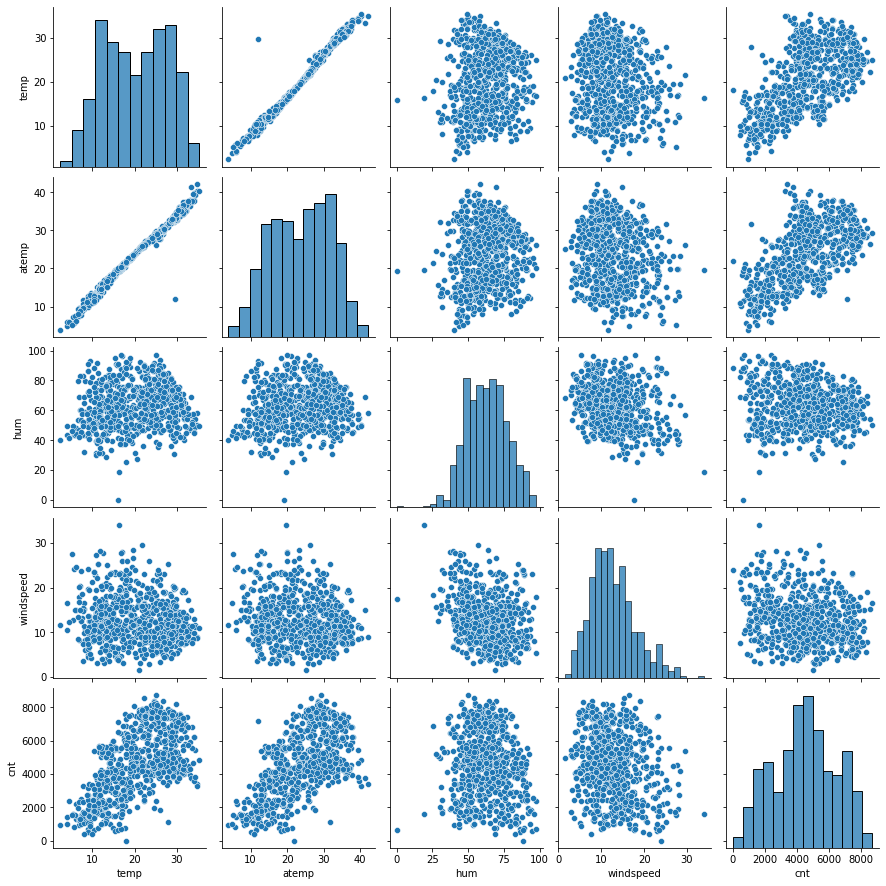

In [450]:
bike_sharing_data_df_continous = bike_sharing_data_df[["temp","atemp","hum","windspeed","cnt"]]
sns.pairplot(bike_sharing_data_df_continous)
plt.show()

### Its very much evident from the data plot the some variables such as 
​ Temparature 
​ Holiday
​ Winspeed 
#### are having good impact and it shows a liniar growth whereas the temperature and atemp shows similar growth as it can be correlated among each other
#### Also it shows positive correlation between cnt and season, it shows more booking on holidays as compared to non holiday, the booking seems to be decreasing with increase in wind, booking seems to increase to some extent with temperature rise.

## Also visualising the categorical variables specifically

<AxesSubplot:xlabel='weekday', ylabel='cnt'>

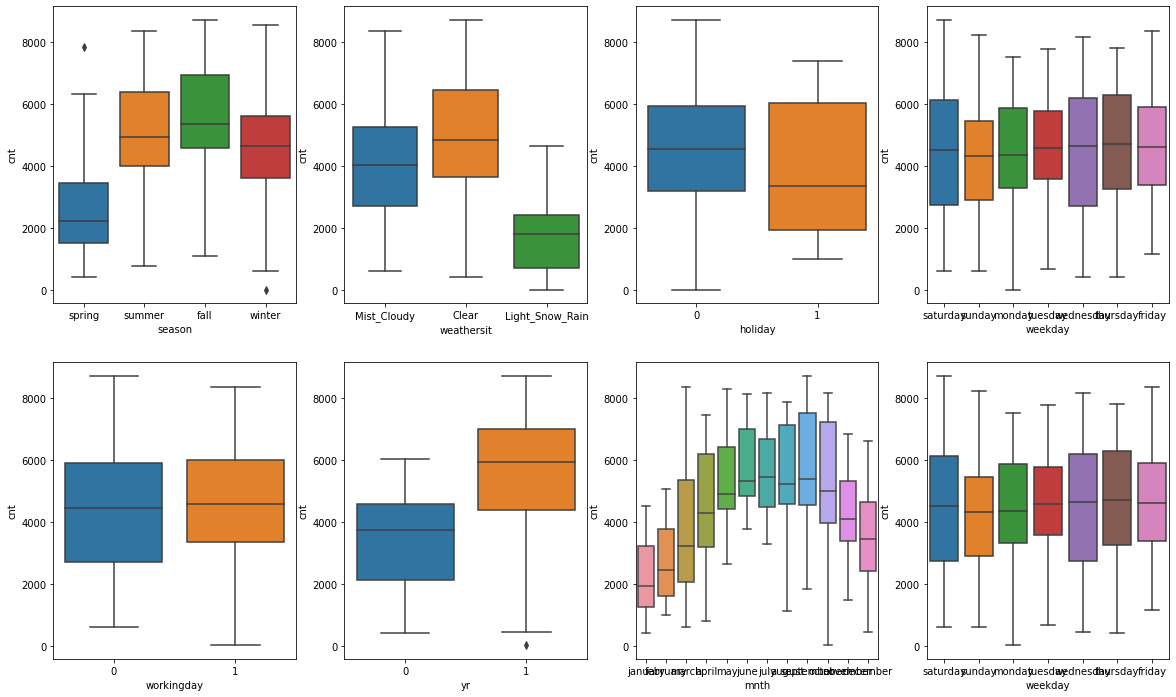

In [451]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_sharing_data_df)
plt.subplot(2,4,2)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_sharing_data_df)
plt.subplot(2,4,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_sharing_data_df)
plt.subplot(2,4,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_sharing_data_df)
plt.subplot(2,4,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_sharing_data_df)
plt.subplot(2,4,6)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_sharing_data_df)
plt.subplot(2,4,7)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_sharing_data_df)
plt.subplot(2,4,8)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_sharing_data_df)

## If we see the above categorical data it seems mostly season, weathersit and year is having good affect rest of the columns does not seems to have much affect as the distribution is similar

# Preparing for the ML model

In [452]:
bike_sharing_data_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,january,0,saturday,0,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,january,0,sunday,0,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,january,0,monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,january,0,tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,january,0,wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### Here we do not have any variables to be converted into binaries but yes we have variable which can be converted into dummy such as season and weathersit

# Creating Dummy Variables

In [453]:
dummies = pd.get_dummies(bike_sharing_data_df[['season','weathersit','mnth','weekday']],drop_first=True)
dummies

,season_spring,season_summer,season_winter,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy,mnth_august,mnth_december,mnth_february,mnth_january,mnth_july,...,mnth_may,mnth_november,mnth_october,mnth_september,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday
0,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
726,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
727,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### Concatenating with the original dataframe

In [454]:
bike_sharing_data_df = pd.concat([bike_sharing_data_df,dummies],axis=1)

In [455]:
bike_sharing_data_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,mnth_may,mnth_november,mnth_october,mnth_september,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday
0,spring,0,january,0,saturday,0,Mist_Cloudy,14.110847,18.18125,80.5833,...,0,0,0,0,0,1,0,0,0,0
1,spring,0,january,0,sunday,0,Mist_Cloudy,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,0
2,spring,0,january,0,monday,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,1,0,0,0,0,0
3,spring,0,january,0,tuesday,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,0,1,0
4,spring,0,january,0,wednesday,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,1


In [456]:
bike_sharing_data_df = bike_sharing_data_df.drop(['season','weathersit','mnth','weekday'],axis=1)

In [457]:
bike_sharing_data_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_may,mnth_november,mnth_october,mnth_september,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,1


## Splitting into train and test data

In [458]:

bike_data_train,bike_data_test = train_test_split(bike_sharing_data_df,train_size = 0.7, test_size = 0.3, random_state = 100)
print(bike_data_train.shape)
print(bike_data_test.shape)

(510, 30)
(219, 30)


## Rescaling the features using MInMax scaler

In [459]:
mm_scaler = MinMaxScaler()

In [460]:
#list of the numeric variables

numeric_scalable_vars = ['temp','atemp','hum','windspeed','cnt']

#scaling the numeric variables using fit_transform

bike_data_train[numeric_scalable_vars] = mm_scaler.fit_transform(bike_data_train[numeric_scalable_vars])
bike_data_train.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_may,mnth_november,mnth_october,mnth_september,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,1,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,0,1,0,0,0,0


# Now we will be training the model and to see which variables are correlated with cnt lets plot a heatmap

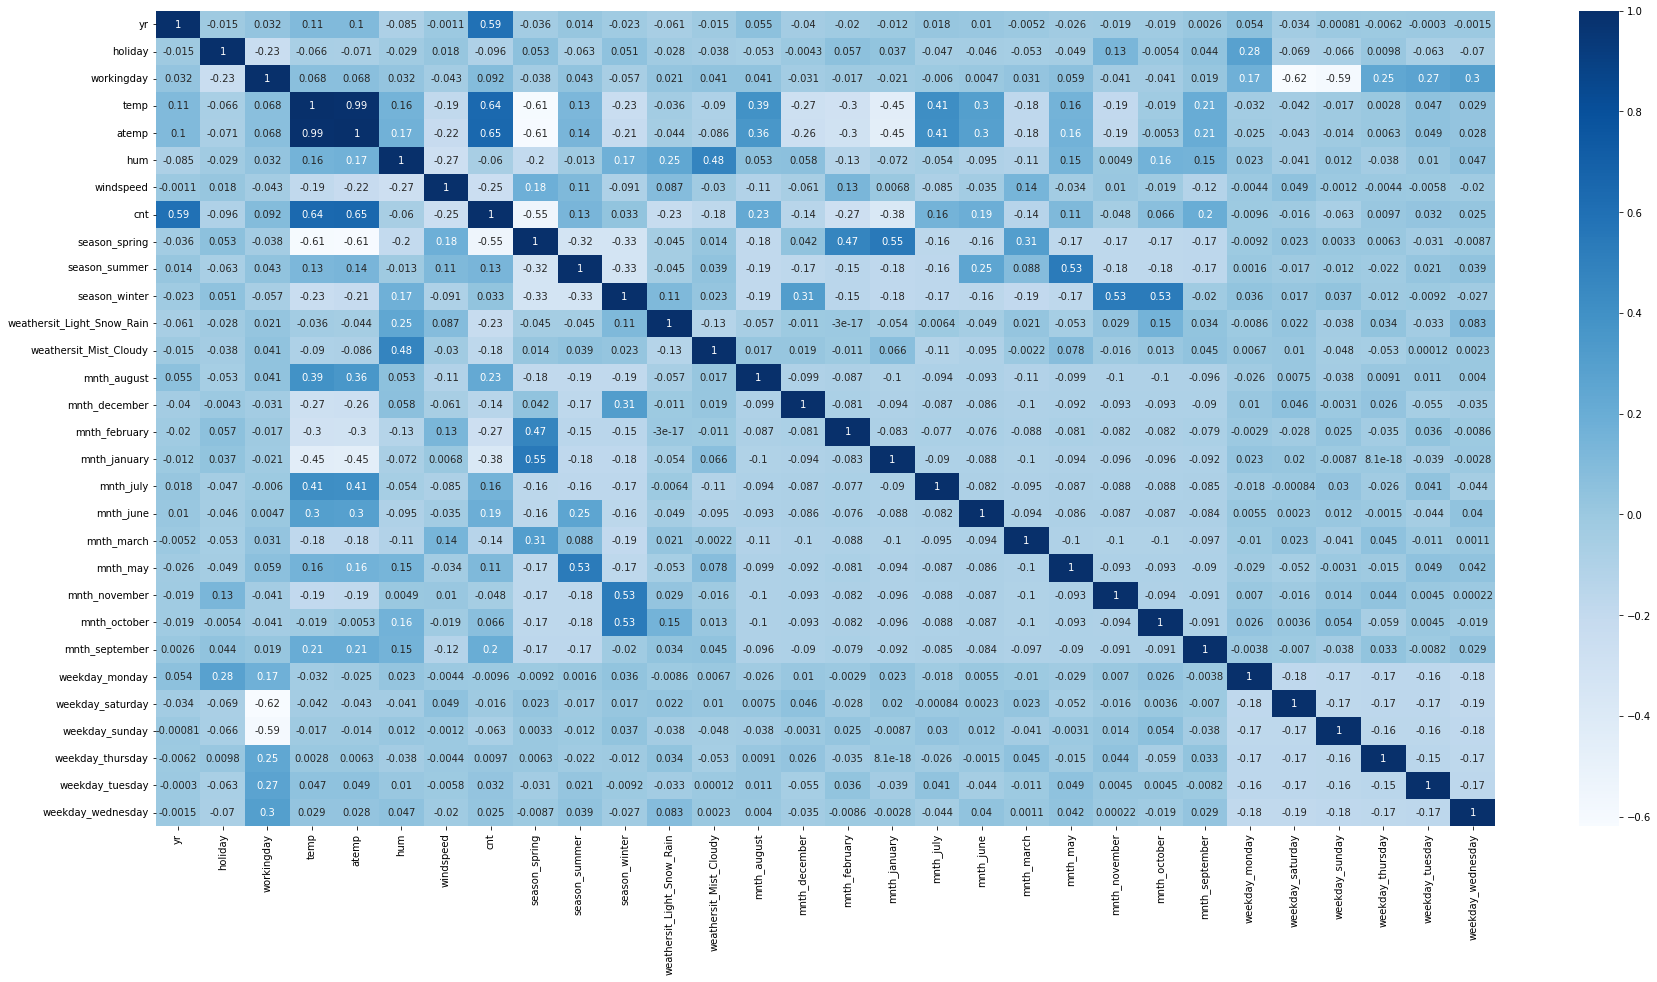

In [461]:
plt.figure(figsize=(30,15))
sns.heatmap(bike_data_train.corr(),annot=True,cmap='Blues')
plt.show()

## We will try to build the model with all the variable and then kick one by one the variable out following hybrid approach

In [462]:
#Dividing the traing data into x train and y train
y_train = bike_data_train.pop('cnt')
x_train = bike_data_train

In [463]:
#adding constant
x_train_constant = sm.add_constant(x_train)

#creating model

bike_lr = sm.OLS(y_train,x_train_constant)

#fitting the model

lr_model = bike_lr.fit()

#retrieving the summary

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          8.42e-181
Time:                        17:18:17   Log-Likelihood:                 528.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     481   BIC:                            -875.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2452      0.035      6.953      0.000       0.176       0.315
yr                             0.2322      0.008     28.792      0.000       0.216       0.248
holiday                        0.0107      0.024      0.443      0.658      -0.037       0.058
workingday                     0.0970      0.012      7.903      0.000       0.073       0.121
temp                           0.4013      0.142      2.821      0.005       0.122       0.681
atemp                          0.0506      0.138      0.366      0.714      -0.221       0.322
hum                           -0.1518      0.039     -3.940      0.000      -0.228      -0.076
windspeed                     -0.1844      0.026     -7.003      0.000      -0.236      -0.133
season_spring                 -0.0486      0.030     -1.618      0.106      -0.108       0.010
season_summer                  0.0382      0.026      1.455      0.146      -0.013       0.090
season_winter                  0.1054      0.028      3.770      0.000       0.050       0.160
weathersit_Light_Snow_Rain    -0.2567      0.026     -9.712      0.000      -0.309      -0.205
weathersit_Mist_Cloudy        -0.0610      0.010     -5.845      0.000      -0.082      -0.041
mnth_august                    0.0161      0.034      0.473      0.637      -0.051       0.083
mnth_december                 -0.0456      0.034     -1.356      0.176      -0.112       0.020
mnth_february                 -0.0322      0.033     -0.978      0.329      -0.097       0.032
mnth_january                  -0.0626      0.034     -1.864      0.063      -0.129       0.003
mnth_july                     -0.0393      0.035     -1.116      0.265      -0.108       0.030
mnth_june                     -0.0017      0.025     -0.067      0.946      -0.051       0.048
mnth_march                     0.0013      0.025      0.052      0.958      -0.047       0.050
mnth_may                       0.0247      0.021      1.169      0.243      -0.017       0.066
mnth_november                 -0.0418      0.036     -1.149      0.251      -0.113       0.030
mnth_october                   0.0077      0.036      0.215      0.830      -0.063       0.078
mnth_september                 0.0818      0.032      2.549      0.011       0.019       0.145
weekday_monday                -0.0215      0.015     -1.395      0.164      -0.052       0.009
weekday_saturday               0.0961      0.014      6.984      0.000       0.069       0.123
weekday_sunday                 0.0415      0.014      2.974      0.003       0.014       0.069
weekday_thursday              -0.0097      0.016     -0.625      0.532      -0.040       0.021
weekday_tuesday               -0.0193      0.016     -1.242      0.215      -0.050       0.011
weekday_wednesday             -0.0057      

# Lets also use VIF to see the vif value and then we can remove columns

In [464]:
vif_bike = pd.DataFrame()
vif_bike['Features'] = x_train.columns
vif_bike['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif_bike['VIF'] = round(vif_bike['VIF'], 2)
vif_bike = vif_bike.sort_values(by = "VIF", ascending = False)
vif_bike

,Features,VIF
2,workingday,85.60
3,temp,67.12
4,atemp,56.09
24,weekday_saturday,19.72
25,weekday_sunday,18.35
7,season_spring,10.80
9,season_winter,9.52
8,season_summer,8.31
20,mnth_november,6.80
21,mnth_october,6.59


In [465]:
#Lets create another model dropping atemp as it is having high p-value
x_attempt1 = x_train.drop('atemp',axis=1)

In [466]:
#adding constant
x_train_constant = sm.add_constant(x_attempt1)

#creating model

bike_lr = sm.OLS(y_train,x_train_constant)

#fitting the model

lr_model = bike_lr.fit()

#retrieving the summary

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          8.74e-182
Time:                        17:18:18   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2451      0.035      6.955      0.000       0.176       0.314
yr                             0.2321      0.008     28.820      0.000       0.216       0.248
holiday                        0.0100      0.024      0.415      0.678      -0.037       0.057
workingday                     0.0969      0.012      7.905      0.000       0.073       0.121
temp                           0.4506      0.046      9.734      0.000       0.360       0.542
hum                           -0.1513      0.038     -3.933      0.000      -0.227      -0.076
windspeed                     -0.1865      0.026     -7.257      0.000      -0.237      -0.136
season_spring                 -0.0482      0.030     -1.607      0.109      -0.107       0.011
season_summer                  0.0387      0.026      1.478      0.140      -0.013       0.090
season_winter                  0.1058      0.028      3.794      0.000       0.051       0.161
weathersit_Light_Snow_Rain    -0.2574      0.026     -9.778      0.000      -0.309      -0.206
weathersit_Mist_Cloudy        -0.0611      0.010     -5.854      0.000      -0.082      -0.041
mnth_august                    0.0144      0.034      0.428      0.669      -0.052       0.081
mnth_december                 -0.0456      0.034     -1.358      0.175      -0.112       0.020
mnth_february                 -0.0323      0.033     -0.982      0.327      -0.097       0.032
mnth_january                  -0.0628      0.034     -1.873      0.062      -0.129       0.003
mnth_july                     -0.0404      0.035     -1.151      0.250      -0.109       0.029
mnth_june                     -0.0030      0.025     -0.119      0.906      -0.052       0.046
mnth_march                     0.0010      0.025      0.043      0.966      -0.047       0.049
mnth_may                       0.0239      0.021      1.140      0.255      -0.017       0.065
mnth_november                 -0.0419      0.036     -1.152      0.250      -0.113       0.030
mnth_october                   0.0075      0.036      0.211      0.833      -0.063       0.078
mnth_september                 0.0811      0.032      2.533      0.012       0.018       0.144
weekday_monday                -0.0209      0.015     -1.366      0.173      -0.051       0.009
weekday_saturday               0.0964      0.014      7.029      0.000       0.069       0.123
weekday_sunday                 0.0419      0.014      3.006      0.003       0.014       0.069
weekday_thursday              -0.0092      0.016     -0.595      0.552      -0.040       0.021
weekday_tuesday               -0.0189      0.015     -1.219      0.223      -0.049       0.012
weekday_wednesday             -0.0054      0.015     -0.362      0.718      -0.035       0.024
===========================================

In [467]:
#checking VIF again after atemp column removal
vif_bike = pd.DataFrame()
vif_bike['Features'] = x_attempt1.columns
vif_bike['VIF'] = [variance_inflation_factor(x_attempt1.values, i) for i in range(x_attempt1.shape[1])]
vif_bike['VIF'] = round(vif_bike['VIF'], 2)
vif_bike = vif_bike.sort_values(by = "VIF", ascending = False)
vif_bike

,Features,VIF
2,workingday,85.58
23,weekday_saturday,19.72
24,weekday_sunday,18.35
6,season_spring,10.79
8,season_winter,9.50
7,season_summer,8.29
3,temp,7.12
19,mnth_november,6.80
20,mnth_october,6.59
11,mnth_august,6.43


In [468]:
x_attempt1.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter',
       'weathersit_Light_Snow_Rain', 'weathersit_Mist_Cloudy', 'mnth_august',
       'mnth_december', 'mnth_february', 'mnth_january', 'mnth_july',
       'mnth_june', 'mnth_march', 'mnth_may', 'mnth_november', 'mnth_october',
       'mnth_september', 'weekday_monday', 'weekday_saturday',
       'weekday_sunday', 'weekday_thursday', 'weekday_tuesday',
       'weekday_wednesday'],
      dtype='object')

In [469]:
x_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter',
       'weathersit_Light_Snow_Rain', 'weathersit_Mist_Cloudy', 'mnth_august',
       'mnth_december', 'mnth_february', 'mnth_january', 'mnth_july',
       'mnth_june', 'mnth_march', 'mnth_may', 'mnth_november', 'mnth_october',
       'mnth_september', 'weekday_monday', 'weekday_saturday',
       'weekday_sunday', 'weekday_thursday', 'weekday_tuesday',
       'weekday_wednesday'],
      dtype='object')

In [470]:
#Lets create another model dropping month as it is having high p-value
x_attempt2 = x_train.drop(['mnth_august',
       'mnth_december', 'mnth_february', 'mnth_january', 'mnth_july',
       'mnth_june', 'mnth_march', 'mnth_may', 'mnth_november', 'mnth_october','atemp','hum','workingday','weekday_wednesday','weekday_tuesday','weekday_thursday',
                          'weekday_saturday','weekday_monday'],axis=1)

In [471]:
#adding constant
x_train_constant = sm.add_constant(x_attempt2)

#creating model

bike_lr = sm.OLS(y_train,x_train_constant)

#fitting the model

lr_model = bike_lr.fit()

#retrieving the summary

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     236.1
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          1.51e-189
Time:                        17:18:21   Log-Likelihood:                 504.38
No. Observations:                 510   AIC:                            -984.8
Df Residuals:                     498   BIC:                            -933.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1983      0.029      6.806      0.000       0.141       0.256
yr                             0.2339      0.008     28.714      0.000       0.218       0.250
holiday                       -0.1048      0.026     -4.054      0.000      -0.156      -0.054
temp                           0.4786      0.033     14.707      0.000       0.415       0.542
windspeed                     -0.1481      0.025     -5.958      0.000      -0.197      -0.099
season_spring                 -0.0541      0.021     -2.637      0.009      -0.094      -0.014
season_summer                  0.0612      0.014      4.362      0.000       0.034       0.089
season_winter                  0.0983      0.016      5.967      0.000       0.066       0.131
weathersit_Light_Snow_Rain    -0.2913      0.024    -11.892      0.000      -0.339      -0.243
weathersit_Mist_Cloudy        -0.0822      0.009     -9.474      0.000      -0.099      -0.065
mnth_september                 0.0893      0.016      5.558      0.000       0.058       0.121
weekday_sunday                -0.0496      0.012     -4.282      0.000      -0.072      -0.027
==============================================================================
Omnibus:                       67.435   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.567
Skew:                          -0.684   Prob(JB):                     1.12e-36
Kurtosis:                       5.433   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Above is the final set of columns for which we are getting a proper adhusted R square to be 0.836

In [472]:
#checking VIF again after atemp column removal
vif_bike = pd.DataFrame()
vif_bike['Features'] = x_attempt2.columns
vif_bike['VIF'] = [variance_inflation_factor(x_attempt2.values, i) for i in range(x_attempt2.shape[1])]
vif_bike['VIF'] = round(vif_bike['VIF'], 2)
vif_bike = vif_bike.sort_values(by = "VIF", ascending = False)
vif_bike

,Features,VIF
3,windspeed,4.59
2,temp,3.91
0,yr,2.07
4,season_spring,2.02
5,season_summer,1.90
6,season_winter,1.66
8,weathersit_Mist_Cloudy,1.55
9,mnth_september,1.23
10,weekday_sunday,1.18
7,weathersit_Light_Snow_Rain,1.08


## Residual Analysis

In [473]:
y_train_pred = lr_model.predict(x_train_constant)
y_train_pred.head()

653    0.729917
576    0.783093
426    0.469776
728    0.347575
482    0.572621
dtype: float64

In [474]:
res = y_train - y_train_pred

/tmp/ipykernel_4849/1482882585.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res)


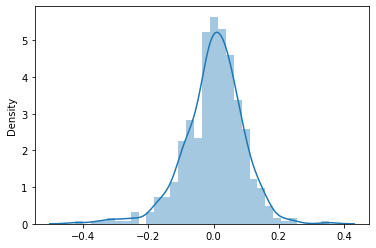

In [475]:
sns.distplot(res)
plt.show()

### As we see that residual follows a normal ditribution

# Let test and Predict with help of the model created

In [476]:
#list of the numeric variables

numeric_scalable_vars = ['temp','atemp','hum','windspeed','cnt']

#scaling the numeric variables using fit_transform

bike_data_test[numeric_scalable_vars] = mm_scaler.transform(bike_data_test[numeric_scalable_vars])
bike_data_test.head()
bike_data_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_may,mnth_november,mnth_october,mnth_september,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,...,0.086758,0.073059,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,...,0.282125,0.260830,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [477]:
y_test = bike_data_test.pop('cnt')
x_test = bike_data_test

#add constant to test

x_test_constant = sm.add_constant(x_test)
x_test_constant.head()

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,...,mnth_may,mnth_november,mnth_october,mnth_september,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday
184,1.0,0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,...,0,0,0,0,1,0,0,0,0,0
535,1.0,1,0,1,0.901354,0.842587,0.610133,0.153728,0,1,...,0,0,0,0,0,0,0,0,0,1
299,1.0,0,0,1,0.511964,0.496145,0.837699,0.334206,0,0,...,0,0,1,0,0,0,0,1,0,0
221,1.0,0,0,1,0.881625,0.795343,0.437098,0.339570,0,0,...,0,0,0,0,0,0,0,0,0,1
152,1.0,0,0,1,0.817246,0.741471,0.314298,0.537414,0,1,...,0,0,0,0,0,0,0,1,0,0


In [478]:
#dropping the variable to match with the column used while training
x_test_constant = x_test_constant.drop(['mnth_august',
       'mnth_december', 'mnth_february', 'mnth_january', 'mnth_july',
       'mnth_june', 'mnth_march', 'mnth_may', 'mnth_november', 'mnth_october','atemp','hum','workingday','weekday_wednesday','weekday_tuesday','weekday_thursday',
                          'weekday_saturday','weekday_monday'],axis=1)

In [479]:
#predicting the test data with the model
y_test_pred = lr_model.predict(x_test_constant)
y_test_pred.head()

184    0.396793
535    0.901996
299    0.409826
221    0.569897
152    0.571017
dtype: float64

In [480]:
#Finally evaluating the model
r2_score(y_true=y_test,y_pred=y_test_pred)

0.8059746366971767

Text(0, 0.5, 'y_pred')

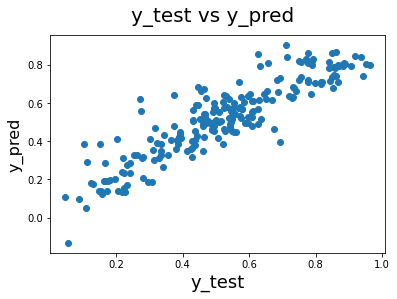

In [481]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  